<a href="https://colab.research.google.com/github/efburgosr/MetNumUN2021II/blob/main/Lab11/Week4IterativeMethodsForLinearSystems_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [ ]:
import numpy as np
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [ ]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [ ]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [ ]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [ ]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [ ]:
# Check the result:

A @ x - b

array([ 1.11022302e-16,  0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00, -2.42861287e-17,  0.00000000e+00,
       -2.77555756e-17,  1.11022302e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [ ]:
# ... ENTER 
def J_iteration(A, b, eps = 1e-7, n_iter = 50):
    
    diag_1d = np.diag(A)
    B = -A.copy()
    np.fill_diagonal(B, 0)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    
    x = np.ones(n)
    for _ in range(n_iter):
        x = BB @ x + c
    return x
#... end ...

In [ ]:
x = J_iteration(A, b)
print(x)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

[ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745031 -0.00030244
 -0.00577279  0.03177549 -0.00422849  0.05284648]


In [ ]:
for k in range(1, 16):
    A1 = A + np.diagflat([-k]*n)
    print(np.linalg.norm(np.diag(1./np.diag(A1))@(-A1.copy()+np.diag(np.diag(A1)))),
          np.linalg.norm(J_iteration(A1, b)-np.linalg.solve(A1, b)))

0.38959181027260875 2.009053247780777e-17
0.4185783948614869 2.7449806536241494e-17
0.4522284025473819 4.7730515306684666e-17
0.4917667095178099 2.3354429532350847e-17
0.5388887887486234 1.8193933307329566e-17
0.5960110344093966 1.036960250308455e-15
0.6667001660296402 2.7708368486989536e-13
0.7564517359241753 1.4990528448342257e-10
0.8742017351588476 2.016159609243833e-07
1.0355299928250665 0.0009191717405677776
1.2702850939751231 23.48163367953915
1.6439565658213244 8260242.793633645
2.334809111760855 261149802433164.72
4.080768845910033 1.3716691464130682e+26
30.715327603064885 1.739863582849129e+61


# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [ ]:
# ... ENTER
def seidel_iteration(A, b, eps = 1e-7, n_iter = 50):
    x = np.ones(b.shape[0])
    
    for _ in range(n_iter):
        for k in range(b.shape[0]):
              x[k] = (b[k]-np.dot(A[k][:k], x[:k])- np.dot(A[k][k+1:], x[k+1:]))/A[k,k]
    return x

In [ ]:
x = seidel_iteration(A,b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

In [ ]:
for k in range(1, 16):
    A1 = A + np.diagflat([-k]*n)
    print(np.linalg.norm(np.diag(1./np.diag(A1))@(-A1.copy()+np.diag(np.diag(A1)))),
          np.linalg.norm(seidel_iteration(A1, b)-np.linalg.solve(A1, b)))

0.38959181027260875 1.554346659933056e-17
0.4185783948614869 2.1006679397246172e-17
0.4522284025473819 4.1966327647007474e-17
0.4917667095178099 1.8526854844795107e-17
0.5388887887486234 1.7433755170605403e-17
0.5960110344093966 3.598244707867574e-17
0.6667001660296402 4.001161414229486e-17
0.7564517359241753 3.0444273447339113e-17
0.8742017351588476 6.098731183695384e-17
1.0355299928250665 6.009258394948638e-17
1.2702850939751231 5.1108145016965626e-17
1.6439565658213244 6.169862969064139e-17
2.334809111760855 1.4488835837920476e-16
4.080768845910033 4.1063361227369436e-09
30.715327603064885 2.224327617064842e+114


# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [ ]:
# ... ENTER
def minimum_res(A, b, eps = 1e-7, n_iter = 50):
    x = np.ones(b.shape[0])
    
    for _ in range(n_iter):
        r = A @ x - b
        k = (r @ A @ r)/np.linalg.norm(A @ r)**2
        x = x - k*r
        
    return x

In [ ]:
x = minimum_res(A,b)

np.testing.assert_allclose(A@x, b)
np.testing.assert_allclose(x, xx)

In [ ]:
for k in range(1, 16):
    A1 = A + np.diagflat([-k]*n)
    print(np.linalg.norm(np.diag(1./np.diag(A1))@(-A1.copy()+np.diag(np.diag(A1)))),
          np.linalg.norm(minimum_res(A1, b)-np.linalg.solve(A1, b)))

0.38959181027260875 2.1986593570450097e-17
0.4185783948614869 3.048131780107179e-17
0.4522284025473819 4.573225939075189e-17
0.4917667095178099 3.647305096833231e-17
0.5388887887486234 2.124593680485185e-17
0.5960110344093966 3.66453918846474e-17
0.6667001660296402 4.192148702340308e-17
0.7564517359241753 nan
0.8742017351588476 6.727507242144006e-17
1.0355299928250665 6.527725485922918e-17
1.2702850939751231 5.0515910130503314e-17
1.6439565658213244 9.100687379121228e-17
2.334809111760855 1.0804347218832563e-13
4.080768845910033 0.00021717913683547106
30.715327603064885 2.081804235084611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


![week-4-lab11[1].png](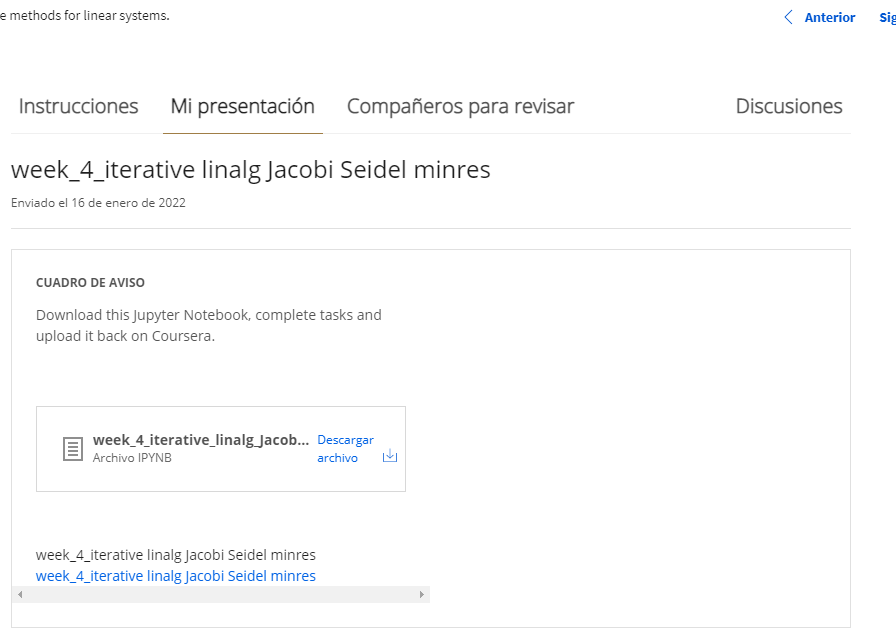)